## 【問題1】ジニ不純度を求める関数
まずは空間を分割するための指標値、ジニ不純度を計算する関数を作成してください。

まずは簡単な例を作り、手計算と関数の結果を比較してください。

例

クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000
この他にもいくつか試してください。

$$
\begin{eqnarray}
I(t) &=& 1 - \sum_{i=1}^{K}P^2(C_i|t)\\
&=& 1 - \sum_{i=1}^{K}\Bigl(\frac{N_{t, i}}{N_{t, all}}\Bigr)^2
\end{eqnarray}
$$

$t$: Index of node<br>
$i$: Index of class<br>
$K$: N of class<br>
$C_i$: $i$-th class<br>
$P^2(C_i|t)$: $C_i$ ratio in $t$-th node<br>
$N_{t, i}$: N of samples in $t$-th node in $i$-th class<br>
$N_{t, all}$: Total samples in $t$-th node

In [26]:
#ジニ不純度を求める関数
import numpy as np
def gini_impurity(target):
    """
    Parameters
    -----------------
    target: ndarray of shape(n_samples, )
    
    Attributes
    -------------
    classes: ndarray of shape(n_unique_value, )
        unique value set in target
    
    Returns
    -----------------
    impurity
    
    """
    #inpurityの初期値は1 (max)
    impurity = 1.0
    #要素が一つもなければimpurity = 0で返す
    if (len(target) == 0):
        impurity = 0.0
        return impurity
    
    #pandasの場合はnumpy arrayに
    target = np.array(target)
    #sample方向は統一して縦に
    target = target.reshape(-1, 1)
    #targetのユニークな要素を取得
    classes = np.unique(target)
    
    #Impurity = 1 - sigma{(Probabiliry_cls)^2}
    for cls in classes:
        impurity -= ((len(target[target == cls]))/(len(target)))**2
    return impurity

In [27]:
#Inpurity = 1 - {(4/10)^2 + (6/10)^2} = 0.48になるデータセット
a = np.array(
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
)

In [28]:
#手計算
1 - ((4/10)**2 + (6/10)**2)

0.48

In [29]:
#関数で計算
gini_impurity(a)

0.48

## 【問題2】情報利得を求める関数
次に、情報利得(Information Gain)を計算する関数を作成してください。先ほど作成したジニ不純度 を計算する関数を呼び出して使います。


まずは簡単な例を作り、手計算と関数の結果を比較してください。

例

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

この他にもいくつか試してください。

$$
IG(p) = I(p) - \frac{N_{left, all}}{N_{p, all}}I(left) - \frac{N_{right, all}}{N_{p, all}}
$$

In [30]:
# Information Gain
def info_gain(parent, left, right):
    """
    Parameters
    -----------------
    parent: ndarray of shape(n_samples, )
    left: ndarray of shape(n_left_samples, )
    right: ndarray of shape(n_right_samples, )
    
    Returns
    -----------------
    information gain
    impurity of parent, left and right
    
    Note
    -----------------

    """
    #親から見た左の子の比率
    l_ratio = len(left) / len(parent)
    #親から見た右の子の比率
    r_ratio = len(right) / len(parent)
    
    #ジニ不純度を親、左の子、右の子に対して算出
    imp_p = gini_impurity(parent)
    imp_l = gini_impurity(left)
    imp_r = gini_impurity(right)
    
    #information gainを算出
    info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)
    
    return info_gain, imp_p, imp_l, imp_r

In [31]:
#i=0-9の位置でyを分割した際の不純度を見てみる

ig = np.array([])
imp = np.empty((0, 3))

for i in range(len(a)+1):
    split_a= np.split(a,  [0, i])
    ig_tmp, imp_p, imp_l, imp_r = info_gain(a, split_a[1], split_a[2])

    #put into list
    ig = np.append( ig, ig_tmp)
    imp = np.append(imp, [np.array([imp_p, imp_l, imp_r])], axis=0)
    
    print("-----------------------------------------------------")
    print("split position: i=%d" % (i))
    #print("ary1 %s, ary2 %s" % (split_y[1], split_y[2]))
    print("left: %s , right: %s" % (split_a[1], split_a[2]))
    print("Impurity(l): %.3f,  Impurity(r): %.3f" % ( imp[i, 1], imp[i, 2]))
    print("Info gain: %.3f" % (ig[i]))
    

-----------------------------------------------------
split position: i=0
left: [] , right: [0 0 0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.480
Info gain: 0.000
-----------------------------------------------------
split position: i=1
left: [0] , right: [0 0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.444
Info gain: 0.080
-----------------------------------------------------
split position: i=2
left: [0 0] , right: [0 0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.375
Info gain: 0.180
-----------------------------------------------------
split position: i=3
left: [0 0 0] , right: [0 1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.245
Info gain: 0.309
-----------------------------------------------------
split position: i=4
left: [0 0 0 0] , right: [1 1 1 1 1 1]
Impurity(l): 0.000,  Impurity(r): 0.000
Info gain: 0.480
-----------------------------------------------------
split position: i=5
left: [0 0 0 0 1] , right: [1 1 1 1 1]
Impurity(l): 0.320,  Impurity(r): 0.

Text(0, 0.5, 'Impurity / Informaiton Gain')

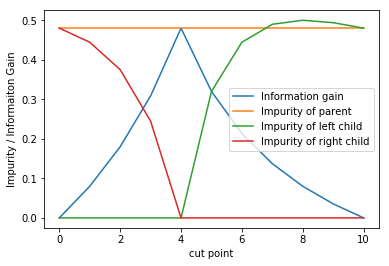

In [32]:
#plotしてみる
#0と1のグループにきちんと分けられた時にInfo gainが最大になることが確認できた。
import matplotlib.pyplot as plt
x = list(range(0, len(ig)))

plt.plot(x, ig, label = 'Information gain')
plt.plot(x, imp[:, 0], label = 'Impurity of parent')
plt.plot(x, imp[:, 1], label = 'Impurity of left child')
plt.plot(x, imp[:, 2], label = 'Impurity of right child')

plt.legend()
plt.xlabel('cut point')
plt.ylabel('Impurity / Informaiton Gain')



## 【問題3】深さ1の決定木分類器クラスの作成
深さが1の決定機分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchDecesionTreeClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

深さ1とは空間の分割を1回だけ行うことを指します。

決定木のアルゴリズム

ある特徴量の軸に対して、全てのパターンのしきい値を考え、それぞれの情報利得を計算していきます。各点の値をしきい値にする方法が一般的です。（ただし、実際にはしきい値の数は点の数よりひとつ少なくて良いことになります）分割の全候補の中で最も情報利得が大きくなるものをそのノードの分割方法として採用します。

ジニ不純度が0になるノード、または指定された深さのノードは葉と呼ばれます。葉にはそれぞれ推定時にどのクラスに分類するかを記録しておきます。ジニ不純度が0でない場合は、多数決により分類するクラスを決定します。

ヒント

これまでのスクラッチ課題に比べてアルゴリズムが複雑です。コードを書く前に、フローチャートなどで整理するようにしましょう。

### Irisデータでやってみる

In [1]:
#read data
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset.keys())
print(dataset.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [2]:
#split data


#import features
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)

#import target value
y = pd.DataFrame(dataset.target, columns = {'species'})
print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [3]:
#concatenate x and y
df = pd.concat((X, y), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#extract only versicolor and virginica
#drop setosa rows(label: 0)

setosa_row = df[df['species'] == 0].index
df_selected = df.drop(setosa_row, axis=0)
df_selected .head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [5]:
from sklearn.model_selection import  train_test_split
#split arrays into two (train, test)
#shuffling is True by default
X_train, X_test, y_train, y_test = train_test_split(np.array(df_selected.iloc[:, :4]), np.array(df_selected.iloc[:, 4]), train_size=3/4)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# Thresholdを渡すバージョンのinformation gainを試す
def info_gain_2(parent, feature, threshold):
        """
        Parameters
        -----------------
        parent: ndarray of shape(n_samples, )

        feature: ndarray of shape(n_samples, )
            a feature used as standard to divide parent 

        threshold: float
            threshold for feature to split parent

        Returns
        -----------------
        information gain

        Note
        -----------------

        """
        left = parent[feature >= threshold]
        right = parent[feature < threshold]

        #親から見た左の子の比率
        l_ratio = len(left) / len(parent)
        #親から見た右の子の比率
        r_ratio = len(right) / len(parent)

        #ジニ不純度を親、左の子、右の子に対して算出
        imp_p = gini_impurity(parent)
        imp_l = gini_impurity(left)
        imp_r = gini_impurity(right)

        #information gainを算出
        info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)

        return info_gain, imp_p, imp_l, imp_r

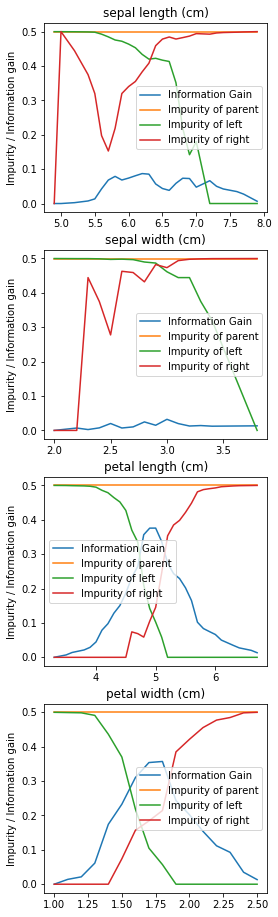

In [14]:
import matplotlib.pyplot as plt
#Info gainをPlotしてみる
fig, axes = plt.subplots(X_train.shape[1], 1, figsize=(4, 4*X_train.shape[1]))

#各特徴量に関してループ
for clm in range(X_train.shape[1]):
        #information gain格納用のndarray
        ig = np.empty((0, 4))

        #特徴量を１つとる
        feature_values = X_train[:, clm]
        #重複を除いて閾値をとる
        thresholds = list(set(feature_values))

        #thresholdを昇順に並べる
        thresholds.sort()

        #info gainを計算して格納。thresholdごとにループ
        for threshold in thresholds:
                ig = np.append(ig, [np.array(info_gain_2(y_train, feature_values, threshold))],axis=0);

        #グラフのタイトルをセット
        axes[clm].set_title(df.columns[clm])

        #info gain、各不純度を描画
        axes[clm].plot(thresholds, ig[:, 0], label='Information Gain')    
        axes[clm].plot(thresholds, ig[:, 1], label='Impurity of parent')
        axes[clm].plot(thresholds, ig[:, 2], label='Impurity of left')
        axes[clm].plot(thresholds, ig[:, 3], label='Impurity of right')

        #legendなど体裁を整える
        axes[clm].set_ylabel('Impurity / Information gain')
        axes[clm].legend()


できた。イメージをつかめたので、クラスを書いてみる。

In [15]:
import numpy as np
class ScratchDecesionTreeClassifier_1():
        def __init__(self):
                #information gain
                self.gain = None
                #yの独立な要素を格納
                self.unique_value = None

                #以下、分類に直接関わるインスタンス変数
                #着目する feature
                self.feature = None
                #基準となるthreshold
                self.threshold = None
                #thresholdによって分類されるlabel
                self.label = None

        def fit(self, X, y):
                """
                決定木による分類を学習する。
                Parameters
                ----------
                X : 次の形のndarray, shape (n_samples, n_features)
                    学習用データの特徴量
                y : 次の形のndarray, shape (n_samples, )
                    学習用データの正解値
                """
                #pandasをnpのarrayに
                X = np.array(X)
                y = np.array(y)

                #0, 1以外の２値で入力された場合への対応（例：a, bを0, 1に変換）
                #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
                self.unique_value = np.unique(y)
                #yを0, 1に変換
                #（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
                y = (y != self.unique_value[0]).astype(np.int64)  

                #特徴量の数
                n_features = X.shape[1]
                #information gainの初期化
                self.gain = 0.0

                #特徴量の数だけループ
                for feature in range(n_features):
                        #特徴量を１つとる
                        feature_values = X_train[:, feature]
                        #重複を除いてとる(閾値として利用)
                        thresholds = np.unique(feature_values)
                        thresholds = np.sort(thresholds)

                        #thresholdの数だけループ
                        for threshold in thresholds:
                                #information gainを算出
                                gain_tmp = self._info_gain(y, feature_values, threshold)

                                if (self.gain < gain_tmp):
                                        self.gain = gain_tmp
                                        self.feature = feature
                                        self.threshold = threshold
                #返り値なし
                return

        def predict(self, X_test):
                """
                決定木を使い推定する。

                Parameters
                ----------
                X_test : 次の形のndarray, shape (n_samples, n_features)
                    サンプル

                Returns
                -------
                    次の形のndarray, shape (n_samples, 1)
                    線形回帰による推定結果
                """
                #pandas -> np.array
                X_test = np.array(X_test)

                #分類の基準となるfeatureのみ取り出す
                X_test = X_test[:, self.feature]
                pred = (X_test >= self.threshold).astype(np.int64)

                #thresholdによって分類されるlabelによってはpredictionの予測を反転
                if not (self.label == self.unique_value[0]):
                        #(0, 1)を (1, 0)に
                        pred = (-1) * (pred -1)

                #(0, 1)を (a, b)に戻す。
                pred = self.unique_value[pred]

                return pred

        def _gini_impurity(self, target):
                """
                Parameters
                -----------------
                target: ndarray of shape(n_samples, )

                Attributes
                -------------
                classes: ndarray of shape(n_unique_value, )
                    unique value set in target

                Returns
                -----------------
                impurity

                """
                #inpurityの初期値は1 (max)
                impurity = 1.0
                #要素が一つもなければimpurity = 0で返す
                if (len(target) == 0):
                        impurity = 0.0
                        return impurity

                #sample方向は統一して縦に
                target = target.reshape(-1, 1)
                #targetのユニークな要素を取得
                classes = np.unique(target)

                #Impurity = 1 - sigma{(Probabiliry_cls)^2}
                for cls in classes:
                        impurity -= ((len(target[target == cls]))/(len(target)))**2
                return impurity

        # information gain
        def _info_gain(self, parent, feature, threshold):
                """
                Parameters
                -----------------
                parent: ndarray of shape(n_samples, )

                feature: ndarray of shape(n_samples, )
                    a feature used as standard to divide parent 

                threshold: float
                    threshold for feature to split parent

                Returns
                -----------------
                information gain

                Note
                -----------------

                """
                #featureとthresholdを用いて左の子と右の子に分割
                left = parent[feature >= threshold]
                right = parent[feature < threshold]

                #親から見た左の子の比率
                l_ratio = len(left) / len(parent)
                #親から見た右の子の比率
                r_ratio = len(right) / len(parent)


                #leftに分けられたラベルとその数を保管
                l_unique = np.unique(left)

                #leftの要素が一個になったら、そのラベルを保管
                #(そのラベルが、thresholdによって選り分けられるラベル)
                if (len(l_unique) < 2):
                        self.label = l_unique[0]

                #ジニ不純度を親、左の子、右の子に対して算出
                imp_p = self._gini_impurity(parent)
                imp_l = self._gini_impurity(left)
                imp_r = self._gini_impurity(right)

                #information gainを算出
                info_gain =  imp_p - (l_ratio* imp_l + r_ratio* imp_r)

                return info_gain

In [16]:
#学習
clf = ScratchDecesionTreeClassifier_1()
clf.fit(X_train, y_train)

In [17]:
#predict
pred = clf.predict(X_test)
print("y_test: ", y_test)
print("pred: ", pred)
print("judge: ", pred == y_test)
print("Accuracy: ", (pred == y_test).sum()/len(y_test))

y_test:  [1 1 2 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1 1 2 2]
pred:  [1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 1 2 1 1 1 1 1 2 2]
judge:  [ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True False  True  True  True
  True]
Accuracy:  0.88


できた。

## 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成
問題3で作成したクラスを発展させ、深さが2の決定木分類器のクラスを作成してください。

深さ2とは空間の分割を2回行うことを指します。

ヒント

各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

## 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成
問題3,4で作成したクラスを発展させ、任意の深さに対応できる決定木分類器のクラスを作成してください。深さを特定の値で指定せず、全ての葉がジニ不純度0となるまで続けられるようにしてください。

[ここ](http://darden.hatenablog.com/entry/2016/12/15/222447)を参考に実装

In [18]:
import numpy as np

class Node():
        """
        Note
        --------------
        Node class of decision tree

        Parameters
        --------------

        Attributes
        --------------
        self.criterion: string ('gini' or 'entropy')
                to decide which criteria to use for calculating info gain
        self.max_depth: int.
                max depth of tree from root node
        self.random_state: 
        self.depth: int.
                depth from root node (flag for search stop at designated max_depth)
        self.left: Node.
                left child
        self.right: Node.
                right child
        self.feature: int (index of columns of a feature)
                a feature with which to classify
        self.threshold: int.
                a threshold with which to classify
        self.label: 
                a classified label judged by the threshold
        self.impurity: float
                gini impurity
        self.info_gain: float
                information gain
        self.n_samples: int.
                number of samples
        self.n_classes: int.
                number of classes in the feature of interest 
        """

        def __init__(self, criterion='gini', max_depth=None, random_state=None):
                self.criterion = criterion
                self.max_depth = max_depth
                self.random_state = random_state
                self.depth = None
                self.left = None
                self.right = None
                self.feature = None
                self.threshold = None
                self.label = None
                self.impurity = None
                self.info_gain = None
                self.n_samples = None
                self.n_classes = None

        def split_node(self, X, y, depth, ini_n_classes):
                #pandas -> np array
                X = np.array(X)
                y = np.array(y)

                self.depth = depth
                self.n_samples = len(y)
                self.n_classes = [len(y[y == i]) for i in ini_n_classes]

                #各クラスのカウント数をdict{key=class名, value=count数}に
                class_count = {i: len(y[y == i]) for i in np.unique(y)}
                #カウント数の最大値のラベルを取得
                self.label = max(class_count.items(), key=lambda x:x[1])[0]
                """
                Memo
                -------
                lambdaは無名関数。lambda a:bで受け取った各要素aに対してbを行う
                ここでは要素xを受け取り、x[1]を返すという意味。
                辞書class_countのアイテム(keyとvalueのセット)を取り出して、
                value(x[1])に関してmax値を求め、そのvalueとkeyをセットとして返している
                """
                self.impurity = self._criterion_func(y)
                
                #要素数を取得
                n_features = X.shape[1]
                #info_gainの初期値
                self.info_gain = 0.0
                
                #葉に到達したら
                #特徴量のクラスが一つだけなら全データが同一クラスとなった(葉に到達)ということ
                if (len(np.unique(y)) == 1):
                        #探索終了
                        return
                    
                #節だったら（葉に到達していなかったら）探索継続
                
                #random_stateが設定されていたら
                if (self.random_state != None):
                        np.random.seed(self.random_state)
                
                #0 - n_featuresのランダムな配列
                #特徴量が選ばれる順番によるバイアスをなくすため
                f_loop_order = np.random.permutation(n_features).tolist()

                """
                permutation(x)はxのコピーを並び替え、shuffle(x)はin-placeで並び替える
                ここでは0-xまでの連続したintを生成してランダムに並び替えて返している
                """

                #各特徴量に関して
                for f in f_loop_order:
                        #その特徴量内の固有な値を抜き出し
                        uniq_feature = np.unique(X[:, f])
                        #分割点を決める（最初と最後の点は除いて平均を出す）
                        split_points = (uniq_feature[:-1] + uniq_feature[1:])/2.0

                        """
                        a = np.array(['b','a','b','b','d','a','a','c','c'])のとき
                        np.unique(a)は順序を昇順にしてユニークな要素を返す['a', 'b', 'c']
                        元の順番を守って['b','a','c']と返したい時はnp.unique(a, return_index=True)
                        """
                        #各thresholdに対して
                        for threshold in split_points:
                                #targetをthresholdに基づいてleft, rightに分割
                                y_l = y[X[:, f] <= threshold]
                                y_r = y[X[:, f] > threshold]

                                #分割によるinfo gainを計算
                                val = self._calc_info_gain(y, y_l, y_r)

                                #保持していたinfo_gainと比較して、計算値が大きければ
                                if (self.info_gain < val):
                                        #新たにnfo_gainとして保管し、その時のfeatureとthresholdも保管
                                        self.info_gain = val
                                        self.feature = f
                                        self.threshold = threshold

                #探索の終了判定
                
                #info gainがゼロなら終わり
                if (self.info_gain == 0.0):
                        return
                #depthが初期化時に引数で指定していたmax_depthに達していたら終わり
                if (depth == self.max_depth):
                        return

                #探索終わっていなかったら再帰的に呼ぶ
                #左側
                X_l = X[X[:, self.feature] <= self.threshold]
                y_l = y[X[:, self.feature] <= self.threshold]
                self.left = Node(self.criterion, self.max_depth)
                self.left._split_node(X_l, y_l, depth + 1, ini_n_classes)

                #右側
                X_r = X[X[:, self.feature] > self.threshold] 
                y_r = y[X[:, self.feature] > self.threshold]
                self.right = Node(self.criterion, self.max_depth)
                self.right._split_node(X_r, y_r, depth + 1, ini_n_classes)

        def _criterion_func(self, y):
                """
                calculate impurity
                """
                classes = np.unique(y)
                n_data = len(y)
                
                #gini_impurity、entropyはどちらも減少するほど乱雑さが少なくなる
                #gini_impurityを基準にする時
                if (self.criterion == "gini"):
                        val = 1
                        for cls in classes:
                                p = float(len(y[y == cls]) / n_data)
                                val -= p ** 2.0
                #entropyを基準にする時
                elif self.criterion == "entropy":
                        val = 0
                        for cls in classes:
                                p = float(len(y[y == cls]) / n_data)
                                if p != 0.0:
                                        val -= p * np.log2(p)
                return val
                
        def _calc_info_gain(self, y_parent, y_left, y_right):
                """
                calculate infomation gain
                """
                #まずジニ不純度 or エントロピーを算出
                #親
                cri_p = self._criterion_func(y_parent)
                #左の子
                cri_l = self._criterion_func(y_left)
                #右の子
                cri_r = self._criterion_func(y_right)

                #親から見た左の子の比率
                l_ratio = len(y_left) / len(y_parent)
                #親から見た右の子の比率
                r_ratio = len(y_right) / len(y_parent)

                #information gainを算出
                info_gain =  cri_p - (l_ratio * cri_l + r_ratio * cri_r)
                return info_gain

        def predict(self, X_test):
                """
                ラベルを予測して返す
                """
                #葉の場合か、指定した深さの節に達した場合
                if (self.feature == None or self.depth == self.max_depth):
                    #自身のラベルを返す
                    return self.label    
                #節の場合は左右の子に分けて探索継続
                else:
                        #Xがthreshold以下ならば左側、
                        if (X_test[self.feature] <= self.threshold):
                                return self.left._predict(X_test)
                        #Xがthresholdより大きければ右側
                        else:
                                return self.right._predict(X_test)
        
    
class ScratchDecesionTreeClassifier_n():
        def __init__(self, criterion="gini", max_depth=None, random_state=None):
                self.criterion = criterion
                self.max_depth = max_depth
                self.random_state = random_state
                self.tree_analysis = TreeAnalysis()
                self.root = None
                self.feature_importances_ = None
        
        def fit(self, X, y):
                """
                Train dataで学習
                """
                #Nodeクラスのインスタンスを生成しroot nodeとする
                self.root = Node(self.criterion, self.max_depth, self.random_state)
                #rootを分割してtreeを構成していく
                self.root.split_node(X, y, 0, np.unique(y))
                #feature_importance
                self.feature_importances_ = self.tree_analysis._get_feature_importance(self.root, X.shape[1])

        def predict(self, X_test):
                """
                学習結果を用いてテストデータ予測
                """
                pred = []
                
                #ここはforじゃないとダメ?
                for s in X_test:
                        pred.append(self.root.predict(s))
                
                #np.arrayに変換して返却
                return np.array(pred)
        
        def score(self, X_test, y_test):
                return sum(self.predict(X_test) == y_test)/float(len(y_test))
                
class TreeAnalysis():
        def __init__(self):
                self.n_features = None
                self.importances = None
        
        def _compute_feature_importance(self, node):
                #葉なら何もしない
                if (node.feature == None):
                        return
                
                #節なら
                #featureごとの重要度を計算して足し合わせていく
                self.importances[node.feature] += node.info_gain * node.n_samples
                
                #左右の子に対して再帰
                self._compute_feature_importance(node.left)
                self._compute_feature_importance(node.right)
        
        def _get_feature_importance(self, root, n_features, normalize=True):
                self.n_features = n_features
                self.importances = np.zeros(n_features)
                
                self._compute_feature_importance(root)
                self.importances /= root.n_samples
                
                
                if (normalize):
                        normalizer = np.sum(self.importances)
                        #ゼロで割らないような対策
                        #(rootの要素が一つしかないときなどは)
                        if (normalizer > 0.0):
                                self.importances /= normalizer
                
                return self.importances
                        

## 【問題6】指標値の算出
分類に関する指標値で精度を確認してください。

### ここからはpyファイルから実行
pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term1/ml-scratch/model/scratch_decision_tree_classifier.py)

In [6]:
import sys
str = '/Users/ohmori/diveintocode-ml/diveintocode-term1/ml-scratch/model'
if str not in sys.path:
        sys.path.append(str)

from scratch_decision_tree_classifier import ScratchDecisionTreeClassifier

In [7]:
import time

#時間計測start
start = time.time()

#学習、推定、評価
clf = ScratchDecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
#時間計測終了
lap = time.time()

print("Time: ", lap - start, ' sec')
print("y_test: ", y_test)
print("pred: ", pred)
print("Accuracy score: ", score)

Time:  0.022787809371948242  sec
y_test:  [1 2 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1]
pred:  [1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 1]
Accuracy score:  0.92


In [8]:
#scikit-learnと比較
import time
from sklearn import tree

#時間計測start
start = time.time()

#学習、推定、評価
clf_sk = tree.DecisionTreeClassifier()
clf_sk.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
#時間計測終了
lap = time.time()

print("Time: ", lap - start, ' sec')
print("y_test: ", y_test)
print("pred: ", pred)
print("Accuracy score: ", score)

Time:  0.0027577877044677734  sec
y_test:  [1 2 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1]
pred:  [1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 1]
Accuracy score:  0.92


In [9]:
#feature importance

print("-"*50)
f_importance_m = clf.feature_importances_
f_importance_sk = clf_sk.feature_importances_

print("My decision tree feature importances:")
for f_name, f_importance in zip(np.array(dataset.feature_names), f_importance_m):
        print("  ", f_name, ":", f_importance)
print("-"*50)
print("Sklearn decision tree feature importances:")
for f_name, f_importance in zip(np.array(dataset.feature_names), f_importance_sk):
        print("  ", f_name, ":", f_importance)

--------------------------------------------------
My decision tree feature importances:
   sepal length (cm) : 0.026709401709401705
   sepal width (cm) : 0.0
   petal length (cm) : 0.14302806517718786
   petal width (cm) : 0.8302625331134104
--------------------------------------------------
Sklearn decision tree feature importances:
   sepal length (cm) : 0.022570225421102652
   sepal width (cm) : 0.04303181386514722
   petal length (cm) : 0.1267056530214425
   petal width (cm) : 0.8076923076923076


## 【問題7】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

In [15]:
import time

#時間計測start
start = time.time()

#学習、推定、評価
clf = ScratchDecisionTreeClassifier()
clf.fit(X_train[:, 2:], y_train)
pred = clf.predict(X_test[:, 2:])
score = clf.score(X_test[:, 2:], y_test)
#時間計測終了
lap = time.time()

print("Time: ", lap - start, ' sec')
print("y_test: ", y_test)
print("pred: ", pred)
print("Accuracy score: ", score)

Time:  0.017100095748901367  sec
y_test:  [1 2 1 2 2 1 1 2 2 2 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1]
pred:  [1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 1]
Accuracy score:  0.92


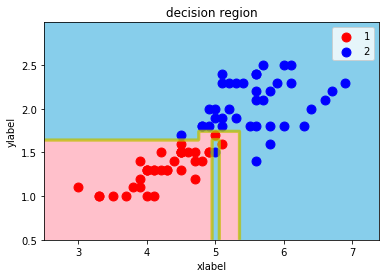

In [16]:
import sys
str = '/Users/ohmori/diveintocode-ml/diveintocode-term1/ml-scratch/utils'
if str not in sys.path:
        sys.path.append(str)
from plot import plot_decision_region
plot_decision_region(X_train[:, 2:], y_train, clf, target_names=['1', '2'])

# 【問題8】決定木の利用場面
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

決定木が他の手法に比べて有効だと考えられるのはどういった場面

分類のアルゴリズムが人間の直感にわかりやすいので、例えば機械学習に関しての知識のない顧客への分類の過程説明などに使いやすい。